# Line Graphs with **pandas**

The purpose of this chapter is to demonstrate the use of line graphs in finance.  In particular, we use line graphs to plot various volatility-related time series.  Our analysis objective is to observe the leverage effect: when stock markets suffer losses there is greater volatility.  In order to do this we utilize the built-in visualization capabilities of **pandas**; these capabilities are built on top of the **matplotlib** package.

The API for **matplotlib** is fairly low level, which means you have to specify a lot of different things even for simply graphs.  In practice this can be cumbersome, especially for quick and dirty plotting.  Many constituents of the Python visualization ecosystem seek to simplify the creation of *standard* graphs, and this is true of the **pandas** visualization functionality.

## Load Packages

Let's begin by loading the packages that we will need.

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as pdr

## `IPython` Magic Commands

Now that we are (implictly) using **matplotlib**, we will have occasion to use our first `IPython` magic command. These magic commands are often referred to as simply *magics*.

The following line of code tells Jupyter to print graphs as output just below the code cell - in the same way that other ouput is printed to the screen.

In [ ]:
%matplotlib inline

Magics are convenience functions that `IPython` adds to base `Python` to make a variety of analysis tasks easier.  

Another example is `%timeit` that performs time tests on code.

In [ ]:
%timeit L = [n ** 2 for n in range(1000)]

203 µs ± 8.65 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


You can read more about magics in Section 1.3 of *Python Data Science Handbook*.  The primary magic command that we will utilize is `%matplotlib inline`.

## Reading In Data

Let's now use **pandas_datareader** to read-in `SPY` and `VIX` data for 2016Q1 through 2021Q2.

In [ ]:
df_spy = pdr.get_data_yahoo(['SPY', '^VIX'], start='2016-01-01', end='2021-06-30')
df_spy = df_spy.round(2)
df_spy.head()

[*********************100%***********************]  2 of 2 completed


Adj Close          Close           High            Low          
                 SPY   ^VIX     SPY   ^VIX     SPY   ^VIX     SPY   ^VIX   
Date                                                                       
2016-01-04    175.91  20.70  201.02  20.70  201.03  23.36  198.59  20.67  \
2016-01-05    176.21  19.34  201.36  19.34  201.90  21.06  200.05  19.25   
2016-01-06    173.98  20.59  198.82  20.59  200.06  21.86  197.60  19.80   
2016-01-07    169.81  24.99  194.05  24.99  197.44  25.86  193.59  22.40   
2016-01-08    167.95  27.01  191.92  27.01  195.85  27.08  191.58  22.48   

              Open            Volume       
               SPY   ^VIX        SPY ^VIX  
Date                                       
2016-01-04  200.49  22.48  222353500    0  
2016-01-05  201.40  20.75  110845800    0  
2016-01-06  198.34  21.67  152112600    0  
2016-01-07  195.33  23.22  213436100    0  
2016-01-08  195.19  22.96  209817200    0

The following code cleans up the data by isolating the the `Close` prices, resetting the index, and then changing the column names

In [ ]:
df_spy = df_spy['Close'].reset_index()
df_spy.rename(columns={'Date':'date','SPY':'spy','^VIX':'vix'}, inplace=True)
df_spy.head()

,date,spy,vix
0,2016-01-04,201.02,20.70
1,2016-01-05,201.36,19.34
2,2016-01-06,198.82,20.59
3,2016-01-07,194.05,24.99
4,2016-01-08,191.92,27.01


## Creating a Basic Price Plot

**pandas** was created by Wes McKinney when he was a quantitative analyst at the hedge fund called AQR.  One of McKinney's goals for **pandas** was to facilitate the analysis of financial time series.  For example, plotting stock prices and returns over time can be done very easily.

The following single line of code produces a line graph consisting of the close prices of SPY over time.

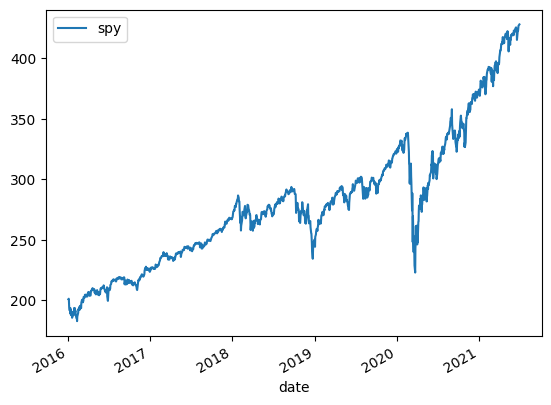

In [ ]:
df_spy.plot(x='date', y='spy');

Note that `.plot()` is a `DataFrame` method.

Now, for the purposes of exploratory data analysis (EDA), this plot may be all that we need.  However, if we needed to share this graph in a publication or presentation, there are a variety of shortcomings that we would need address by utilizing various arguments of the `.plot()` method.

## Improving Our Graph

As a first improvement, let's add a title to our graph, and add some grid lines to make it a little easier to read.

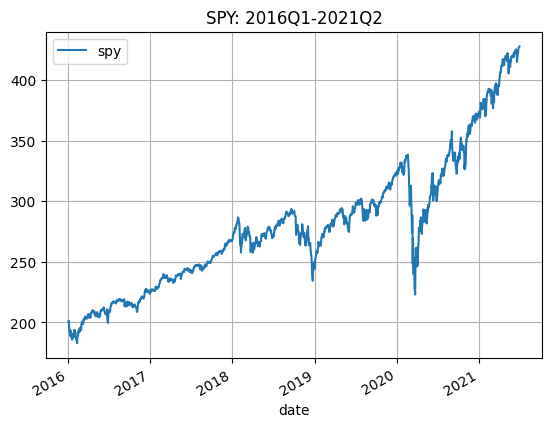

In [ ]:
df_spy.\
    plot(
        x = 'date',
        y = 'spy',
        title = 'SPY: 2016Q1-2021Q2',
        grid = True,
    );

In order to add custom labels to the x-axis and y-axis we will have to work with the **matplotlib** API.  Don't worry about the details too much right now, just copy this code if you need to relabel your axes.

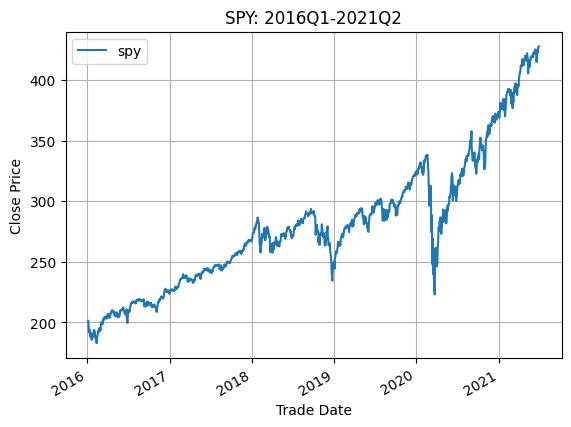

In [ ]:
ax = df_spy.\
        plot(
            x = 'date',
            y = 'spy',
            title = 'SPY: 2016Q1-2021Q2',
            grid = True,
        );
ax.set_xlabel('Trade Date');
ax.set_ylabel('Close Price');

---

**Coding Challenge:** Copy the code above and then see what the effect is of adding these arguments to `.plot()`:

    1. figsize = (10, 5)
    2. style = 'k--'
    3. alpha = 0.5

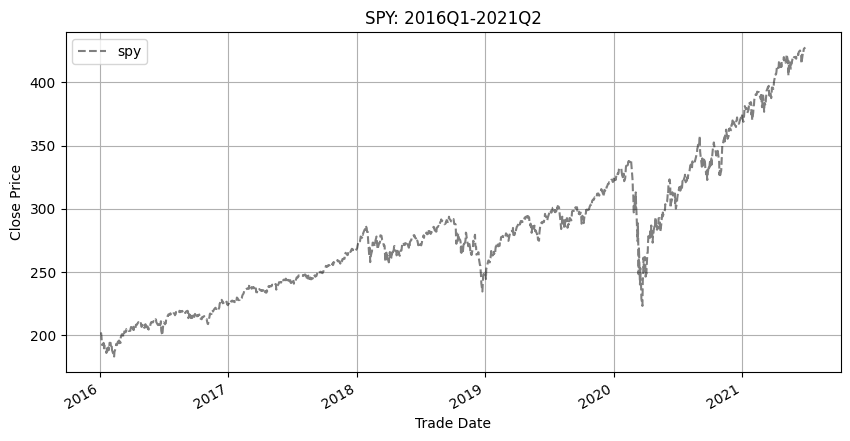

In [ ]:
#| code-fold: true
#| code-summary: "Solution"
ax = df_spy.\
        plot(
            x = 'date',
            y = 'spy',
            title = 'SPY: 2016Q1-2021Q2',
            grid = True,
            figsize = (10, 5),
            style = 'k--',
            alpha = 0.5,
        );
ax.set_xlabel('Trade Date');
ax.set_ylabel('Close Price');

---

For the remainder of the chapter we will utilize graphs as we would for EDA, so we won't concern ourselves with titles and labels.  

However, whenever graphs are being used to communicate results with a broader audience, they should be properly labeled.

## Subplot of Price and Returns

In this section, we will plot prices and returns as subplots on the same x-axis.  This dual plot will be our first observation of the *leverage effect*: when the stock market suffers losses there is greater volatility.

Let's begin by adding a `return` column to `df_spy`.

In [ ]:
df_spy['return'] = df_spy['spy'] / df_spy['spy'].shift(1) - 1
df_spy.head()

,date,spy,vix,return
0,2016-01-04,201.02,20.70,NaN
1,2016-01-05,201.36,19.34,0.001691
2,2016-01-06,198.82,20.59,-0.012614
3,2016-01-07,194.05,24.99,-0.023992
4,2016-01-08,191.92,27.01,-0.010977


Now we can use the `subplots` argument of `.plot()` to plot both the prices and returns simulatneously.

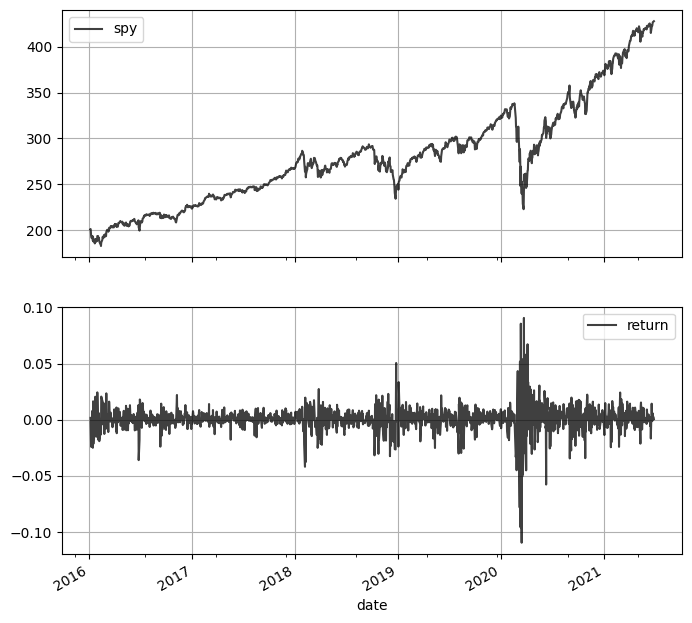

In [ ]:
df_spy.plot(x='date', y=['spy', 'return'], subplots=True, style='k', grid=True, alpha=0.75, figsize=(8, 8),);

It is easy to confirm visually that when the market goes down, the magnitude of the proximate returns is large, i.e. there is greater volatility.  Similarly, during bull markets, returns tend to be smaller in magnitude.

## Realized Volatility

Plotting the realized volatility - i.e. the rolling standard deviation - is another way to observe the leverage effect.

In order to execute rolling calculations  in **pandas** we will use the `DataFrame.rolling()` method.

In [ ]:
pd.options.display.max_rows = 6
df_spy['return'].rolling(42).std() * np.sqrt(252)

0            NaN
1            NaN
2            NaN
          ...   
1379    0.118643
1380    0.118678
1381    0.117790
Name: return, Length: 1382, dtype: float64

Note that the argument of `.rolling()` is the window size, which we have set to two months. 

Let's add this rolling realized volatility calculation to `df_spy`.

In [ ]:
df_spy['realized_vol'] = df_spy['return'].rolling(42).std() * np.sqrt(252)
df_spy.head()

,date,spy,vix,return,realized_vol
0,2016-01-04,201.02,20.70,NaN,NaN
1,2016-01-05,201.36,19.34,0.001691,NaN
2,2016-01-06,198.82,20.59,-0.012614,NaN
3,2016-01-07,194.05,24.99,-0.023992,NaN
4,2016-01-08,191.92,27.01,-0.010977,NaN


Again, we can use the `subplot` argument of `.plot()` to plot all three time series.

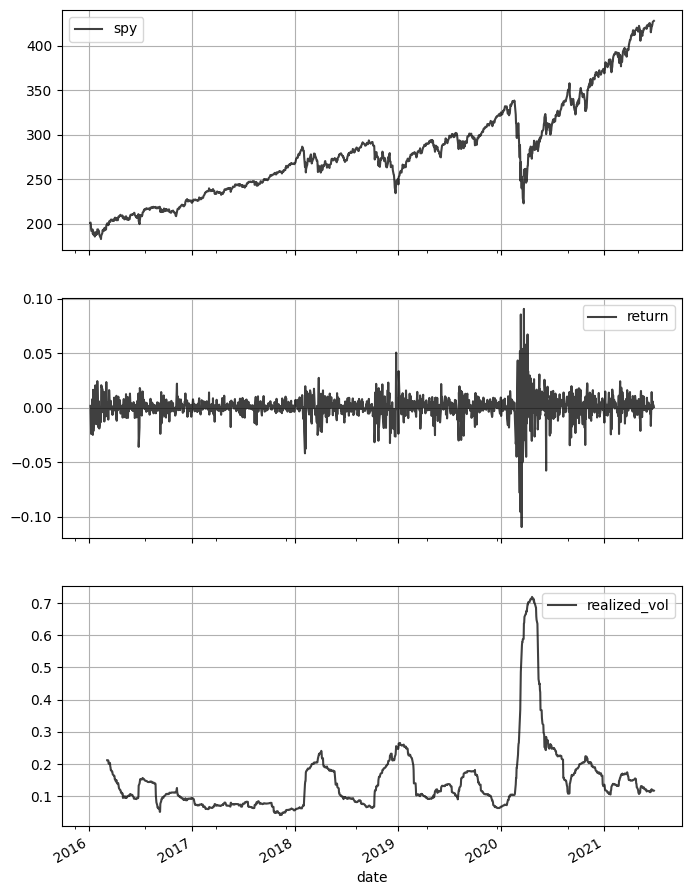

In [ ]:
df_spy.plot(x='date', y=['spy', 'return', 'realized_vol',], subplots=True, style='k', grid=True, alpha=0.75, figsize=(8, 12));

Notice that when there is a market downturn, there is a spike in the realized volatility graph.

## Implied Volatility - The VIX Index

During times of market stress, options all become more expensive.  One measure of the relative cheapness or expensiveness of options is *implied volatility*.  When options become more expensive, implied volatility rises.

One of the complexities of implied volatility measurements is that even for a single underlying they differ depending on strike and expiration.  However, all implied volatility measurements tend to rise and fall together.

The VIX index is a single number that summarizes the general level of option implied volatility for options on the S&P500.  The S&P500 represents a large number of the most important stocks in America.  Moreover, S&P500 options are the most actively traded options in the world.  For these reasons, the VIX is a good barometer for overall implied volatility level in the stock market. 

Let's plot `vix` along side the other volatility  measures in the same graph.

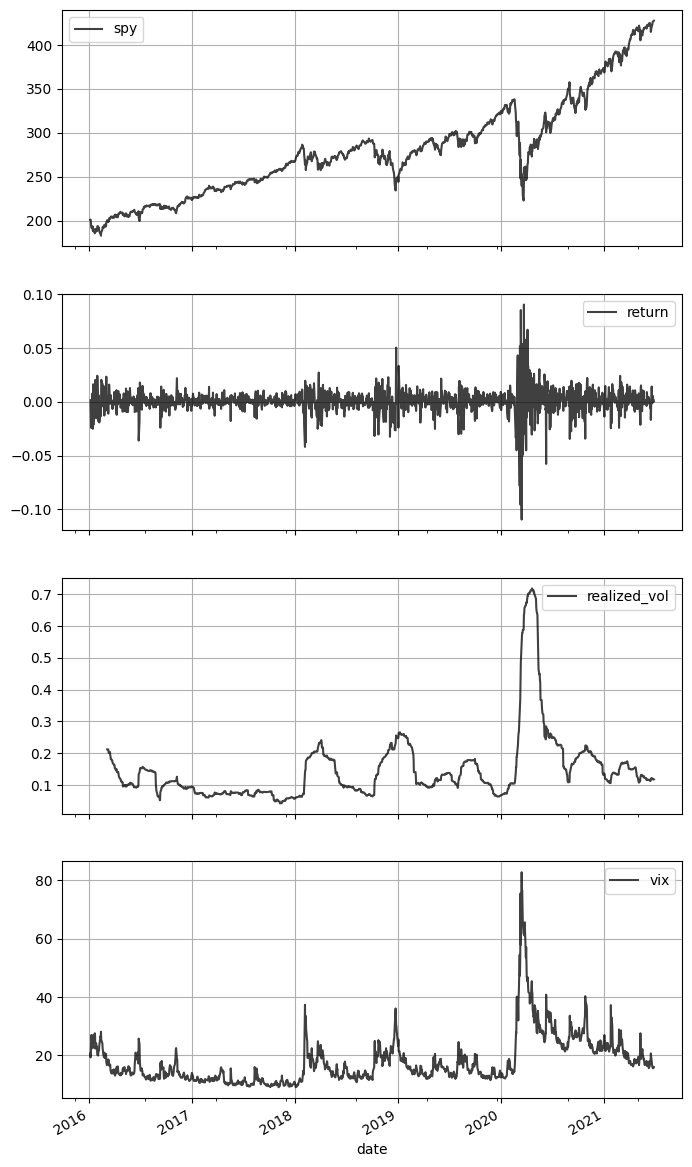

In [ ]:
df_spy.plot(x='date', y=['spy', 'return', 'realized_vol', 'vix',], subplots=True, style='k', grid=True, alpha=0.75, figsize=(8, 16));

This plot demonstrates typical behavior of stock market returns and volatility:  when there is a market downturn, there is a spike in both implied volatility and realized volatility.

## Further Reading

*Python Data Science Handbook (VanderPlas)* - Section 1.3 - Python Magic Commands

*Python for Finance (Hilpisch)* - Section 6.2 - Financial Data

*Python for Data Analysis (McKinney)* - Section 8.1 - A Brief **matplotlib** API Primer

*Python for Data Analysis (McKinney)* - Section 8.2 - Plotting Functions in **pandas**